<a href="https://colab.research.google.com/github/afifibd/Machine-Learning/blob/main/Week-6/K_Means_Clustering_Mall_Customers_Lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama      : Afif Ibadurrahman Jalaluddin

Nim       : 1103210221

Lecture 6 :  K-Means Clustering

Dataset : Mall_Customers

Dokumentasi ChatGPT : https://chat.openai.com/share/25f7f0ec-1afa-46bc-b19d-8536f380a8c7

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Exploratory Data Analysis

In [2]:
import pandas as pd

# Ganti path_file dengan path lengkap file dataset di Google Drive Anda
path_file = "/content/drive/MyDrive/Dataset/Mall_Customers.csv"

# Membaca dataset menjadi DataFrame
df = pd.read_csv(path_file)

# Tampilkan lima baris pertama dari DataFrame
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#Preprocessing

Drop kolom CustomerID

In [4]:
# Drop kolom 'CustomerID' dari DataFrame
df.drop(columns=['CustomerID'], inplace=True)

# Tampilkan lima baris pertama dari DataFrame setelah menghapus 'CustomerID'
print(df.head())


    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


Mengubah typo di feature Genre menjadi Gender

In [7]:
# Ubah nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Tampilkan lima baris pertama dari DataFrame setelah mengubah nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
# Konversi fitur kategorikal 'Gender' menjadi representasi numerik
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


#Modelling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

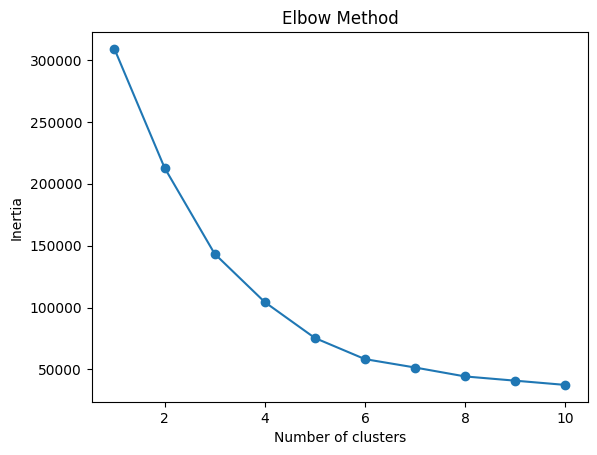

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang akan digunakan untuk clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Inisialisasi daftar inertia
inertia = []

# Uji jumlah cluster dari 1 hingga 10
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [47]:
# Tentukan jumlah cluster
n_clusters = 6

# Inisialisasi dan fit model K-Means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df)

# Tambahkan kolom cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Tampilkan hasil clustering
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,5
2,1,20,16,6,3
3,1,23,16,77,5
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,4
196,1,45,126,28,0
197,0,32,126,74,4
198,0,32,137,18,0


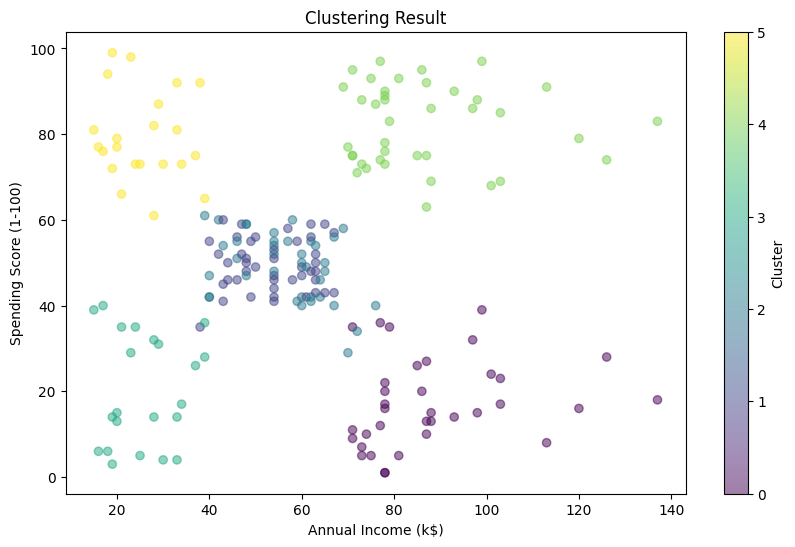

In [48]:
# Plot scatter untuk Annual Income dan Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering Result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


#Evaluating

In [49]:
from sklearn.metrics import silhouette_score
# Evaluasi k-means menggunakan inertia
inertia_scores = kmeans.inertia_
print("Inertia :", inertia_scores)

# Evaluasi k-means menggunakan inertia silhouette score
silhouette_scores = silhouette_score(df, kmeans.labels_)
print("Silhouette score :", silhouette_scores)

Inertia : 58350.65449462818
Silhouette score : 0.45273739491155446
